In [2]:
import requests
from bs4 import BeautifulSoup
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from pylab import *
from collections import Counter
import time
import urllib
import re

## <center>Préambule, objectif du cours

!! plot de préambule purement esthétique pour montrer l'exemple !!

!! Ne pas executer les cellules du préambule sans la bibliothèse perso !!

In [56]:
pd.set_option('display.max_colwidth', -1)
HTML(df.to_html(escape=False, formatters=dict(Posters=put_icon)))

,Rank,Rate,Posters,Name,Year,Runtime (min),Genre,Synopsis of the film,Director(s),Actor(s),Bugget (M$)
0,1,9.3,,Les évadés,1994,142,[Drama],"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler]",28.34
1,2,9.2,,Le parrain,1972,175,"[Crime, Drama]",The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane Keaton]",134.97
2,3,9.0,,The Dark Knight: Le chevalier noir,2008,152,"[Action, Crime, Drama]","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine]",534.86
3,4,9.0,,"Le parrain, 2ème partie",1974,202,"[Crime, Drama]","The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton]",57.30
4,5,8.9,,Le seigneur des anneaux: Le retour du roi,2003,201,"[Adventure, Drama, Fantasy]",Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom]",377.85
5,6,8.9,,Pulp Fiction,1994,154,"[Crime, Drama]","The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.",Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson, Bruce Willis]",107.93
6,7,8.9,,La liste de Schindler,1993,195,"[Biography, Drama, History]","In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis.",Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Caroline Goodall]",96.90
7,8,8.9,,Douze hommes en colère,1957,96,[Drama],A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John Fiedler]",4.36
8,9,8.8,,Inception,2010,148,"[Action, Adventure, Sci-Fi]",A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe]",292.58
9,10,8.8,,Fight Club,1999,139,[Drama],"An insomniac office worker and a devil-may-care soapmaker form an underground fight club that evolves into something much, much more.",David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier]",37.03


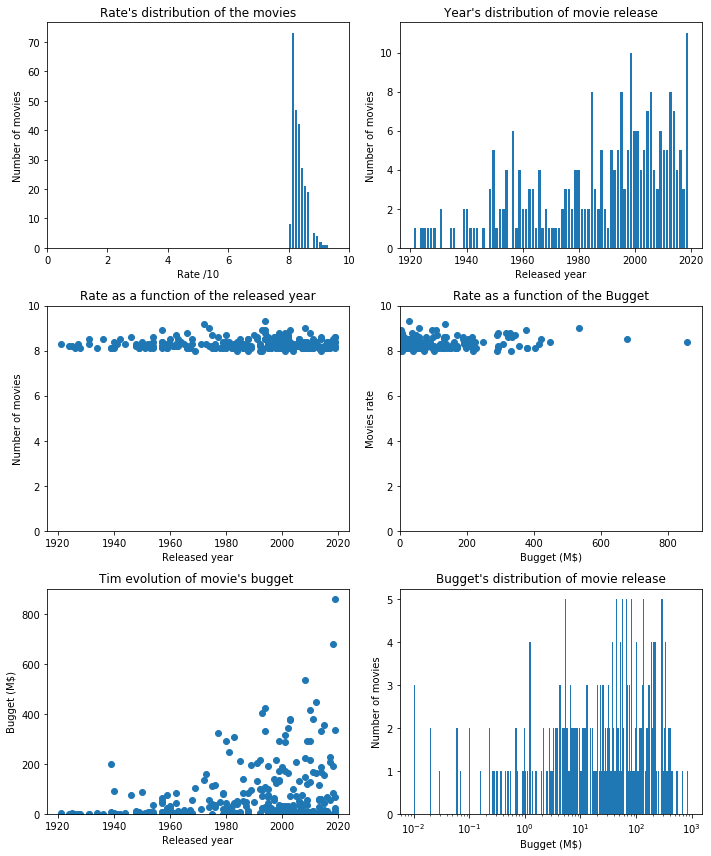

In [58]:
baba(df)

# <center>Allez on y va !

## Etape 1 : Tout plein de data

In [ ]:
from pylab import *
import numpy as np

In [2]:
url = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating'

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
response = requests.get(url)
html= response.content
soup = BeautifulSoup(html, 'lxml')

In [60]:
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb "Top 250"
(Sorted by IMDb Rating Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="ht

Arfff !! C'est brut. Utile, mais brut...

## Etape 1bis : Tous les cris les S.O.S...

On va regarder champ par champ en se déplacant dedans avec les palises CSS de la page.

In [8]:
soup.select('h3.lister-item-header a')

[<a href="/title/tt0111161/">Les évadés</a>,
 <a href="/title/tt0068646/">Le parrain</a>,
 <a href="/title/tt0468569/">The Dark Knight: Le chevalier noir</a>,
 <a href="/title/tt0071562/">Le parrain, 2ème partie</a>,
 <a href="/title/tt0167260/">Le seigneur des anneaux: Le retour du roi</a>,
 <a href="/title/tt0110912/">Pulp Fiction</a>,
 <a href="/title/tt0108052/">La liste de Schindler</a>,
 <a href="/title/tt0050083/">Douze hommes en colère</a>,
 <a href="/title/tt1375666/">Inception</a>,
 <a href="/title/tt0137523/">Fight Club</a>,
 <a href="/title/tt0120737/">Le seigneur des anneaux: La communauté de l'anneau</a>,
 <a href="/title/tt0109830/">Forrest Gump</a>,
 <a href="/title/tt0060196/">Le bon, la brute et le truand</a>,
 <a href="/title/tt0167261/">Le seigneur des anneaux: Les deux tours</a>,
 <a href="/title/tt0133093/">Matrix</a>,
 <a href="/title/tt0099685/">Les affranchis</a>,
 <a href="/title/tt0080684/">L'empire contre-attaque</a>,
 <a href="/title/tt0073486/">Vol au-dess

On va ensuite selectionner l'élément de text, hors balises.

In [10]:
[i.text for i in soup.select('h3.lister-item-header a')]

['Les évadés',
 'Le parrain',
 'The Dark Knight: Le chevalier noir',
 'Le parrain, 2ème partie',
 'Le seigneur des anneaux: Le retour du roi',
 'Pulp Fiction',
 'La liste de Schindler',
 'Douze hommes en colère',
 'Inception',
 'Fight Club',
 "Le seigneur des anneaux: La communauté de l'anneau",
 'Forrest Gump',
 'Le bon, la brute et le truand',
 'Le seigneur des anneaux: Les deux tours',
 'Matrix',
 'Les affranchis',
 "L'empire contre-attaque",
 "Vol au-dessus d'un nid de coucou",
 'Harakiri',
 'Joker',
 'Parasite',
 'Interstellar',
 'La Cité de Dieu',
 'Le voyage de Chihiro',
 'Il faut sauver le soldat Ryan',
 'La ligne verte',
 'La vie est belle',
 'Seven',
 'Le silence des agneaux',
 'La guerre des étoiles',
 'Les sept samouraïs',
 'La vie est belle',
 'Avengers: Infinity War',
 'Whiplash',
 'Intouchables',
 'Le prestige',
 'Les infiltrés',
 'Le pianiste',
 'Gladiator',
 'American History X',
 'Usual Suspects',
 'Léon',
 'The Lion King',
 'Terminator 2 - Le jugement dernier',
 'Cin

Tadaaaaam !!

Allez, quelques exemples pour les autres informations.

In [11]:
Name = [i.text for i in soup.select('h3.lister-item-header a')]
Year = [i.text for i in soup.select('h3.lister-item-header span.lister-item-year')]
rate = [i.text for i in soup.select('div.inline-block strong')]

In [17]:
Genre = [i.text.strip() for i in soup.select('p.text-muted span.genre')]

In [14]:
poster_url = [link.get('loadlate') for link in soup.findAll('img')]

## Etape 2 : Toutes les pages

In [12]:
pages = [1, 51, 101, 151, 201]
for k in pages :
    url = f'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={k}&ref_=adv_nxt'
    print(url)

https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt


Du coup on a le lien de toutes les pages du  ranking. On pourrait donc imaginer ca comme code d'acquisition

### Attention ! Big server is watching you

Mais la on aura un rythme de requêtes trop rapide pour être humain (logique) ce que le serveur peut prendre comme une attaque DDOS.

In [3]:
pages = [1, 51, 101, 151, 201]
Name = []
Year = []
Genre = []
posters_links = []

for k in pages :
    
    url = f'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={k}&ref_=adv_nxt'
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, 'lxml')
    time.sleep(1) 
    
    Name = Name + [i.text for i in soup.select('h3.lister-item-header a')]
    Year = Year + [i.text for i in soup.select('h3.lister-item-header span.lister-item-year')]
    Genre = Genre + [i.text.strip() for i in soup.select('p.text-muted span.genre')]
    posters_links =posters_links + [link.get('loadlate') for link in soup.findAll('img')]

## Etape 3. Une database bien propre

In [63]:
import pandas as pd

In [64]:
df = pd.DataFrame()

df['Rank'] = np.arange(1,251,1)
df['Name'] = Name
df['Posters'] = posters_links
df['Year'] = Year
df['Genre'] = Genre

In [65]:
df.head()

,Rank,Name,Posters,Year,Genre
0,1,Les évadés,"https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg",(1994),Drama
1,2,Le parrain,"https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",(1972),"Crime, Drama"
2,3,The Dark Knight: Le chevalier noir,"https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg",(2008),"Action, Crime, Drama"
3,4,"Le parrain, 2ème partie","https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",(1974),"Crime, Drama"
4,5,Le seigneur des anneaux: Le retour du roi,"https://m.media-amazon.com/images/M/MV5BNzA5ZDNlZWMtM2NhNS00NDJjLTk4NDItYTRmY2EwMWZlMTY3XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX67_CR0,0,67,98_AL_.jpg",(2003),"Adventure, Drama, Fantasy"


## Etape 3bis. On avait dit propre...

In [29]:
from IPython.core.display import HTML

In [66]:
def put_icon(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)
HTML(df.head().to_html(escape=False, formatters=dict(Posters=put_icon)))

,Rank,Name,Posters,Year,Genre
0,1,Les évadés,,(1994),Drama
1,2,Le parrain,,(1972),"Crime, Drama"
2,3,The Dark Knight: Le chevalier noir,,(2008),"Action, Crime, Drama"
3,4,"Le parrain, 2ème partie",,(1974),"Crime, Drama"
4,5,Le seigneur des anneaux: Le retour du roi,,(2003),"Adventure, Drama, Fantasy"


<b> Allez qui c'est les plus forts? <br>
Évidemment c'est les verts. <br>
On a un bon public et les meilleurs supporters !

## Etape 4. Propre... mais clean ?

En fait, à ce stade, c'est agréable regarder pour un humain, mais si tu veux te servir numériquement des données à va faloir les nétoyer. Le data cleaning va retirer tous les artéfactes et convertir les data sous une forme exploitable.

Typiquement sur l'année, il y a des pétouilles. Exemple

In [4]:
print(Year[0])
print(Year[59])

(1994)
(I) (2017)


In [ ]:
import re

In [34]:
pages = [1, 51, 101, 151, 201]
Name = []
Year = []
Genre = []
posters_links = []

for k in pages :
    url = f'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={k}&ref_=adv_nxt'
    response = requests.get(url)
    time.sleep(1) #important, if you run to much loops without a friendly delay, the website can fear an hacker attack -> sleep(1)
    html = response.content
    soup = BeautifulSoup(html, 'lxml')
    
    Name = Name + [i.text for i in soup.select('h3.lister-item-header a')]
    Year = Year + [re.findall("\d{4}", i.text) for i in soup.select('h3.lister-item-header span.lister-item-year')]
    Genre = Genre + [i.text.strip() for i in soup.select('p.text-muted span.genre')]
    posters_links = posters_links + [link.get('loadlate') for link in soup.findAll('img')]

In [ ]:
df = pd.DataFrame()

df['Rank'] = np.arange(1,251,1)
df['Posters'] = posters_links
df['Name'] = Name

Autre problème :

In [42]:
print(Year[:][0])
print(Year[:][1])

['1994']
['1972']


In [41]:
print(Year[0][:])
print(Year[1][:])

['1994']
['1972']


In [ ]:
df['Year']=[int(Year[i][0]) for i in range (len(Year))]

Autre exemple, la séparation d'items

In [44]:
Genre

['Drama',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Crime, Drama',
 'Adventure, Drama, Fantasy',
 'Crime, Drama',
 'Biography, Drama, History',
 'Drama',
 'Action, Adventure, Sci-Fi',
 'Drama',
 'Action, Adventure, Drama',
 'Drama, Romance',
 'Western',
 'Adventure, Drama, Fantasy',
 'Action, Sci-Fi',
 'Biography, Crime, Drama',
 'Action, Adventure, Fantasy',
 'Drama',
 'Action, Drama, History',
 'Crime, Drama, Thriller',
 'Comedy, Drama, Thriller',
 'Adventure, Drama, Sci-Fi',
 'Crime, Drama',
 'Animation, Adventure, Family',
 'Drama, War',
 'Crime, Drama, Fantasy',
 'Comedy, Drama, Romance',
 'Crime, Drama, Mystery',
 'Crime, Drama, Thriller',
 'Action, Adventure, Fantasy',
 'Action, Adventure, Drama',
 'Drama, Family, Fantasy',
 'Action, Adventure, Sci-Fi',
 'Drama, Music',
 'Biography, Comedy, Drama',
 'Drama, Mystery, Sci-Fi',
 'Crime, Drama, Thriller',
 'Biography, Drama, Music',
 'Action, Adventure, Drama',
 'Drama',
 'Crime, Mystery, Thriller',
 'Action, Crime, Drama',
 'Anim

In [45]:
def Convert(string): 
    return list(string.split(", "))  

[Convert(Genre[i]) for i in range (len (Genre))]

[['Drama'],
 ['Crime', 'Drama'],
 ['Action', 'Crime', 'Drama'],
 ['Crime', 'Drama'],
 ['Adventure', 'Drama', 'Fantasy'],
 ['Crime', 'Drama'],
 ['Biography', 'Drama', 'History'],
 ['Drama'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Drama'],
 ['Action', 'Adventure', 'Drama'],
 ['Drama', 'Romance'],
 ['Western'],
 ['Adventure', 'Drama', 'Fantasy'],
 ['Action', 'Sci-Fi'],
 ['Biography', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Drama'],
 ['Action', 'Drama', 'History'],
 ['Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Drama', 'Thriller'],
 ['Adventure', 'Drama', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Animation', 'Adventure', 'Family'],
 ['Drama', 'War'],
 ['Crime', 'Drama', 'Fantasy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Crime', 'Drama', 'Mystery'],
 ['Crime', 'Drama', 'Thriller'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Drama'],
 ['Drama', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Drama', 'Music'],
 ['Biography', 'Comedy', 'Drama'],
 ['Dram

In [46]:
df['Genre'] = [Convert(Genre[i]) for i in range (len (Genre))]

In [49]:
def put_icon(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)
HTML(df.head().to_html(escape=False, formatters=dict(Posters=put_icon)))

,Rank,Posters,Name,Year,Genre
0,1,,Les évadés,1994,[Drama]
1,2,,Le parrain,1972,"[Crime, Drama]"
2,3,,The Dark Knight: Le chevalier noir,2008,"[Action, Crime, Drama]"
3,4,,"Le parrain, 2ème partie",1974,"[Crime, Drama]"
4,5,,Le seigneur des anneaux: Le retour du roi,2003,"[Adventure, Drama, Fantasy]"


# <center>TADAM !! Allez qui c'est les plus forts...

## Partie 5. Faisons un peu de statistiques

In [50]:
def Make_spreadlist(data):
    Slist = []
    for d in data :
        for dl in d:
            Slist.append(dl)
    return Slist

Genre_type = Make_spreadlist(df['Genre'])

In [51]:
Genre_type

['Drama',
 'Crime',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Crime',
 'Drama',
 'Adventure',
 'Drama',
 'Fantasy',
 'Crime',
 'Drama',
 'Biography',
 'Drama',
 'History',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'Romance',
 'Western',
 'Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Sci-Fi',
 'Biography',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Drama',
 'Action',
 'Drama',
 'History',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Drama',
 'Thriller',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Animation',
 'Adventure',
 'Family',
 'Drama',
 'War',
 'Crime',
 'Drama',
 'Fantasy',
 'Comedy',
 'Drama',
 'Romance',
 'Crime',
 'Drama',
 'Mystery',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Music',
 'Biography',
 'Comedy',
 'Drama',
 'Drama',
 'Mystery',
 'S

In [53]:
from collections import Counter

(-0.75, 20.75)

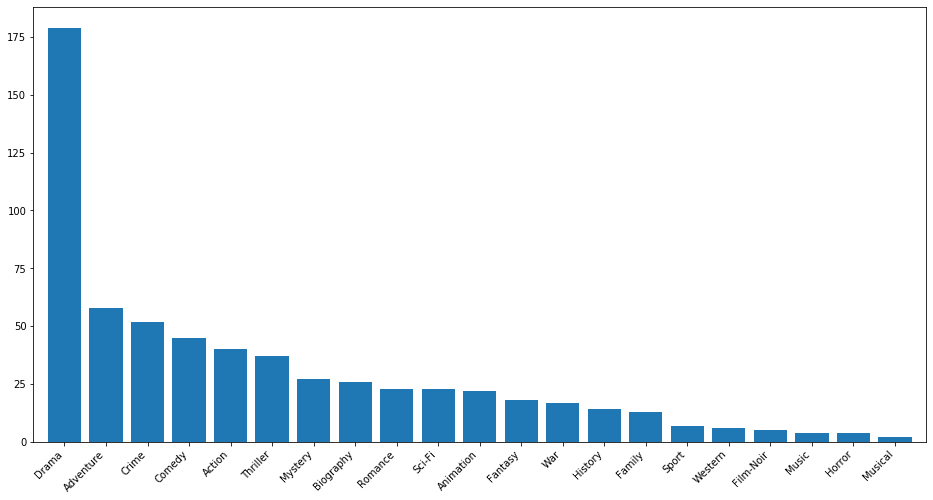

In [54]:
def make_hist(data):
    counts = Counter(data)
    labels, values = zip(*counts.items())
    indexSort = np.argsort(values)[::-1] # sort your values in descending order
    labels = np.array(labels)[indexSort] # rearrange the data
    values = np.array(values)[indexSort]
    indexes = np.arange(len(labels))
    return values, labels, indexes

plt.figure(1, figsize=(16, 8)) 
values, labels, indexes = make_hist(Genre_type)
plt.bar(indexes, values)
plt.xticks(indexes, labels, rotation=45, ha='right')
plt.xlim(-0.75, len(indexes)-0.25)

Pour le scrapping et le traitement de toutes les métadonnées, j'ai ouvert au publique mon code:

https://github.com/EG-devforge/WebScraping_on_IMDbTop250